In [1]:
from pathlib import Path
import sys

import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

sys.path.append("..")

from util_image import (
    get_annotation_from_mask_file,
    get_mask_file,
    invert_mask,
    pil_to_array_1c,
    pil_to_array_3c,
)

In [2]:
data_dir = Path.cwd().parent / "hawking_data_dir" / "objects_dir" / "cart"
image_path = list(data_dir.glob("*.jpg"))[10]

In [3]:
mask_file = get_mask_file(image_path)
xmin, xmax, ymin, ymax = get_annotation_from_mask_file(
    mask_file, True
)

In [4]:
foreground = Image.open(image_path)
mask = invert_mask(Image.open(mask_file))

In [5]:
foreground = foreground.crop((xmin, ymin, xmax, ymax))
mask = mask.crop((xmin, ymin, xmax, ymax))

orig_w, orig_h = foreground.size

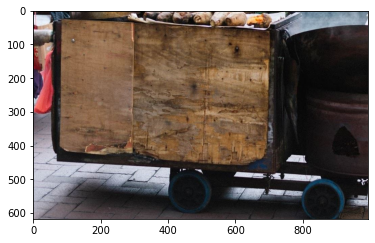

In [6]:
fig, ax = plt.subplots(1, 1)
ax.imshow(foreground)

In [8]:
orig_w, orig_h

(994, 618)

In [19]:
coords = np.array([[0, 0], [994, 0], [0, 618], [994, 618]])
M = np.eye(3)
M[2, 0] = -0.0005  # x perspective (about y)
M[2, 1] = 0.00015  # y perspective (about x)

print(M)
for coord in coords:
    print(
        (
            (M[0, 0] * coord[0] + M[0, 1] * coord[1] + M[0, 2]) /
            (M[2, 0] * coord[0] + M[2, 1] * coord[1] + M[2, 2])
        ),
        (
            (M[1, 0] * coord[0] + M[1, 1] * coord[1] + M[1, 2]) /
            (M[2, 0] * coord[0] + M[2, 1] * coord[1] + M[2, 2])
        ),
    )

max_w = 0
max_h = 0
for coord in coords:
    denom = M[2, 0] * coord[0] + M[2, 1] * coord[1] + M[2, 2]
    max_w = max(max_w, coord[0] / denom)
    max_h = max(max_h, coord[1] / denom)
    print(coord[0] / denom, coord[1] / denom)
print(max_w, max_h)


[[ 1.0e+00  0.0e+00  0.0e+00]
 [ 0.0e+00  1.0e+00  0.0e+00]
 [-5.0e-04  1.5e-04  1.0e+00]]
0.0 0.0
1976.1431411530814 0.0
0.0 565.5715200878558
1668.6251468860164 1037.4349504784286
0.0 0.0
1976.1431411530814 0.0
0.0 565.5715200878558
1668.6251468860164 1037.4349504784286
1976.1431411530814 1037.4349504784286


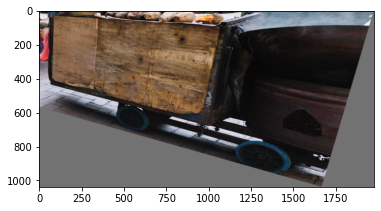

In [24]:
M = np.eye(3)
M[2, 0] = -0.0005  # x perspective (about y)
M[2, 1] = 0.00015  # y perspective (about x)

coords = np.array([[0, 0], [orig_w, 0], [0, orig_h], [orig_w, orig_h]])
max_w = 0
max_h = 0
for coord in coords:
    denom = M[2, 0] * coord[0] + M[2, 1] * coord[1] + M[2, 2]
    max_w = max(max_w, coord[0] / denom)
    max_h = max(max_h, coord[1] / denom)
max_w = int(max_w + 1)
max_h = int(max_h + 1)
img = cv2.warpPerspective(
    pil_to_array_3c(foreground),
    M,
    # dsize=(orig_w, orig_h),
    dsize=(max_w, max_h),
    borderValue=(114, 114, 114),
)
fig, ax = plt.subplots(1, 1)
ax.imshow(img)

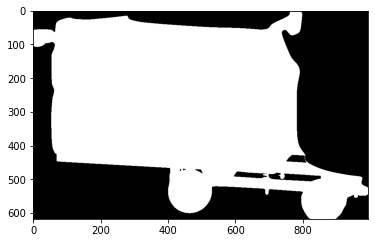

In [11]:
fig, ax = plt.subplots(1, 1)
ax.imshow(mask)

In [14]:
pil_to_array_1c(mask).max()

255

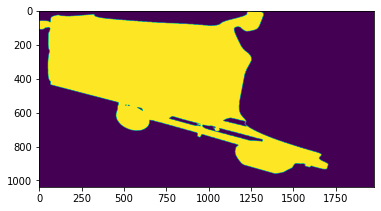

In [25]:
M = np.eye(3)
M[2, 0] = -0.0005  # x perspective (about y)
M[2, 1] = 0.00015  # y perspective (about x)
# M[2, 0] = random.uniform(-perspective, perspective)  # x perspective (about y)
# M[2, 1] = random.uniform(-perspective, perspective)  # y perspective (about x)
img_mask = cv2.warpPerspective(
    pil_to_array_1c(mask),
    M,
    # dsize=(orig_w, orig_h),
    dsize=(1977, 1038),
)
fig, ax = plt.subplots(1, 1)
ax.imshow(img_mask)